# Inaugural Project

Imports and set magics:

In [2]:
import numpy as np
import pandas as pd
from types import SimpleNamespace
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
from scipy import optimize

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from inauguralproject import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

The goal of this question is to examine what happens to the ratio $\frac{H_F}{H_M}$ when the parameter values of $\alpha$ and $\sigma$ changes.


To begin with, the model parameters are defined. Then a loop is created for examining what happens to the $\frac{H_F}{H_M}$ when $\alpha$ and $\sigma$ vary. Inside the loop I also solve the model discretely with .solve_discrete(). I then use the results to compute the HF/HM ratio.

Finally, a table is created to present the results.  

In [3]:
# Set mode
model_one = HouseholdSpecializationModelClass()

# Define the different values of alpha and sigma
alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1.0, 1.5]

# Create table header
print("Alpha      Sigma      HF/HM Ratio")

# Looping over the alpha and sigma values to find the HF/HM ratios
for alpha in alpha_values:
    for sigma in sigma_values:
        # Set the current alpha and sigma values in the model
        model_one.par.alpha = alpha
        model_one.par.sigma = sigma

        # Solve the model discretely
        opt = model_one.solve_discrete()

        # Calculate the HF/HM ratio
        hf_hm_ratio = opt.HF / opt.HM

        # Print the values
        print(f"{alpha:<10} {sigma:<10} {hf_hm_ratio:.4f}")

Alpha      Sigma      HF/HM Ratio
0.25       0.5        0.5463
0.25       1.0        0.3088
0.25       1.5        0.2154
0.5        0.5        1.0000
0.5        1.0        1.0000
0.5        1.5        1.0000
0.75       0.5        1.8306
0.75       1.0        3.2388
0.75       1.5        4.6424


For alpha = 0.25: I observe that when sigma increases the HF/HM ratio decreases.

For alpha = 0.50: I find that when sigma increases the HF/HM ratio remains constant at 1. This implies that HF and HM are equal.

For alpha = 0.75: It is seen that an increasing sigma leads to a increasing HF/HM ratio. 

# Question 2

The $\log\left(\frac{H_{F}}{H_{M}}\right)$ ratio will in this question be plotted against the $\log\left(\frac{w_{F}}{w_{M}}\right)$ ratio for varying values of $w_{F}$


To begin with the model is set and there is created a vector for the different values of $w_{F}$. Then, a loop is created to find the values, where I for each of the different $w_{F}$ calculates the two log ratios HF/HM and wF/wM.

Lastly, the results are illustrated in a scatter plot. 

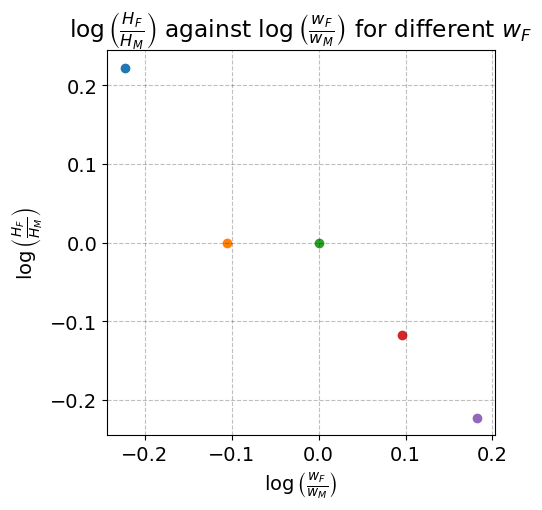

In [9]:
# Set model
model_two = HouseholdSpecializationModelClass()

# Different female wage values
wF_vec = [0.8, 0.9, 1.0, 1.1, 1.2]

# plot
fig, fig1 = plt.subplots(figsize=(5, 5))
fig1.set_title(r"$\log\left(\frac{H_{F}}{H_{M}}\right)$" + " against " r"$\log\left(\frac{w_{F}}{w_{M}}\right)$" + " for different " r"$w_{F}$")
fig1.set_xlabel(r"$\log\left(\frac{w_{F}}{w_{M}}\right)$")
fig1.set_ylabel(r"$\log\left(\frac{H_{F}}{H_{M}}\right)$")


# Creating loop for female wage values
for wF in wF_vec:
    model_two.par.wF = wF
    solution = model_two.solve_discrete()

    # defining the two log ratios
    log_HFHM = np.log(solution.HF/solution.HM)
    log_wFwM = np.log(wF/1)

    # add to plot
    fig1.scatter(log_wFwM, log_HFHM)

There is in general a negative trend. However it is observed that when $\log\left(\frac{w_{F}}{w_{M}}\right)$ is between -0.1 and 0.0 the $\log\left(\frac{H_{F}}{H_{M}}\right)$ do not decrease.

# Question 3

Question 2 will be reconsidered. The choice set is now continuous instead of discrete as before.

First, the model is defined. Then, the model is solved with the function solve_wF_vec().

I use the results from the function to find $\log\left(\frac{w_{F}}{w_{M}}\right)$ and $\log\left(\frac{H_{F}}{H_{M}}\right)$.

Lastly, I plot them against each other in scatter plot. 

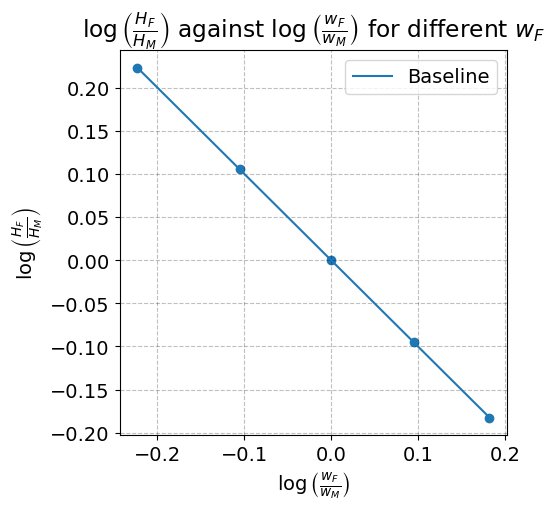

In [10]:
# Set model
model_three = HouseholdSpecializationModelClass()

# plot
fig, fig1 = plt.subplots(figsize=(5, 5))
fig1.set_title(r"$\log\left(\frac{H_{F}}{H_{M}}\right)$" + " against " r"$\log\left(\frac{w_{F}}{w_{M}}\right)$" + " for different " r"$w_{F}$")
fig1.set_xlabel(r"$\log\left(\frac{w_{F}}{w_{M}}\right)$")
fig1.set_ylabel(r"$\log\left(\frac{H_{F}}{H_{M}}\right)$")

# Solve the model
model_three.solve_wF_vec()

# Find log relationships
log_wFwM_c = np.log(model_three.par.wF_vec)
log_HFHM_c = np.log(model_three.sol.HF_vec/model_three.sol.HM_vec)

# add to plot
fig1.scatter(log_wFwM_c, log_HFHM_c)
fig1.plot(log_wFwM_c, log_HFHM_c, label="Baseline")
fig1.legend()

# Question 4

Initially, values for $\alpha$ and $\sigma$ which minimizes $\left(\beta_{0}-\hat{\beta}_{0}\right)^{2}+\left(\beta_{1}-\hat{\beta}_{1}\right)^{2}$ are found.

To do this I first set the model. I then create the objective function. Next, i create the bounds along with an initial guess.

To solve the model I now use the objective function, bound and the initial guess to run the optimize.minimize(). I use the method "Nelder-Mead".

Finally, I print the results - estimated values for alpha and sigma.

In [11]:
# Set model
model_four = HouseholdSpecializationModelClass()

# Objective function
def objective_function(x):
    model_four.par.alpha = x[0]
    model_four.par.sigma = x[1]

    model_four.solve_wF_vec()
    model_four.run_regression()

    # saving beta hat values
    beta0 = model_four.sol.beta0
    beta1 = model_four.sol.beta1
    return (model_four.par.beta0_target - beta0)**2 + (model_four.par.beta1_target - beta1)**2

# Creating bounds and intitial guess
bounds = [(0,1), (0,1)]
guess = (0.5, 0.5)

# Solve model
result = optimize.minimize(objective_function, x0=guess, method="Nelder-Mead", bounds=bounds)
print(f'alpha = {result.x[0]:5.3f}\nsigma = {result.x[1]:5.3f}')

alpha = 0.982
sigma = 0.100


I now illustrate how the model fits the data.

I thus create a figure where I compare the results from Siminsky and Teysenga (2022) with the baseline model (model_three) and the model with new alpha and sigma values (model_four).

I do that by first defining model_five. Then I initiate a figure, where I will plot the different graphs.

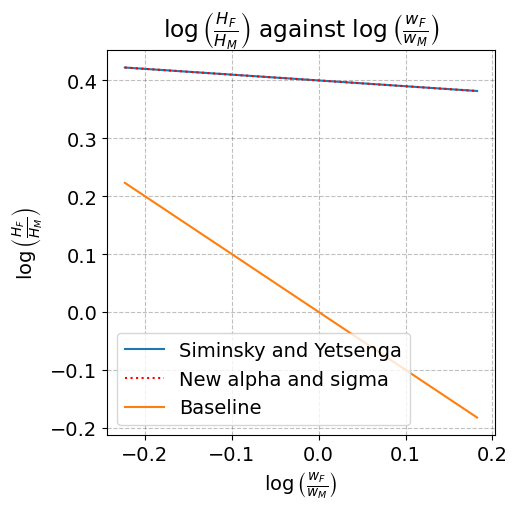

In [14]:
# The results from Siminsky and Yetsenga (2022)
model_five = HouseholdSpecializationModelClass()

fig, fig1 = plt.subplots(figsize=(5,5))

x = np.log(model_five.par.wF_vec)
y = model_five.par.beta0_target + model_five.par.beta1_target*x

fig1.plot(x, y, linestyle ='-', label = "Siminsky and Yetsenga")
fig1.set_title(r"$\log\left(\frac{H_{F}}{H_{M}}\right)$" + " against " r"$\log\left(\frac{w_{F}}{w_{M}}\right)$")
fig1.set_xlabel(r"$\log\left(\frac{w_{F}}{w_{M}}\right)$")
fig1.set_ylabel(r"$\log\left(\frac{H_{F}}{H_{M}}\right)$")


# The model from earlier with the new alpha and sigma values
model_four.par.alpha = 0.982
model_four.par.sigma = 0.100
model_four.solve()
x_1 = np.log(model_four.par.wF_vec)
y_1 = model_four.par.beta0_target + model_four.par.beta1_target*x_1
fig1.plot(x_1, y_1, color = "red", linestyle=':', label="New alpha and sigma")

# Baseline model
model_three.solve_wF_vec()
x_2 = np.log(model_three.par.wF_vec)
y_2 = np.log(model_three.sol.HF_vec/model_three.sol.HM_vec)

fig1.plot(x_2, y_2, linestyle='-', label="Baseline")


# add to plot
fig1.legend()
plt.show()


It appears on the figure that using the new values $\left(\alpha,\sigma\right)=\left(0.982,0.100\right)$ yields results that align quite well with Siminsky and Yetsenga.

Comparing these findings with the baseline model with $\left(\alpha,\sigma\right)=\left(0.5,1\right)$ it is clear that baseline is way steeper and intercepts the y-axis at a lower level.

The difference is a result of $\alpha = 0.982$ implies that males have a very small productivity at home relative to females. Furthermore, the elasticity of substitution is also way smaller in Siminsky and Yetsenka $\sigma = 0.1$  

# Question 5

I will try an extension of the model, such that males and females achieves different disutility from time spend on working. The maximization problem of the household is now

$\max_{L_{M},H_{M},L_{F},H_{F}}\frac{Q^{1-\rho}}{1-\rho}-\nu\left(\frac{T_{M}^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}\right)+\kappa\left(\frac{T_{F}^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}\right),\rho>1,\nu>0,\kappa>0,\epsilon>0$

The s.t. is the same and so is the baseline parameters. The only thing I change is that

$\nu=0.002,\kappa=0.001$

Which implies males get more disutility from time spend on work compared to women.

First, the model is defined. Second, I initiate a figure where I begin with plotting Siminsky and Yetsenga's model along with the baseline model. Third, I solve the new extended model, and add it to the figure.

Lastly, I present the results in the figure.

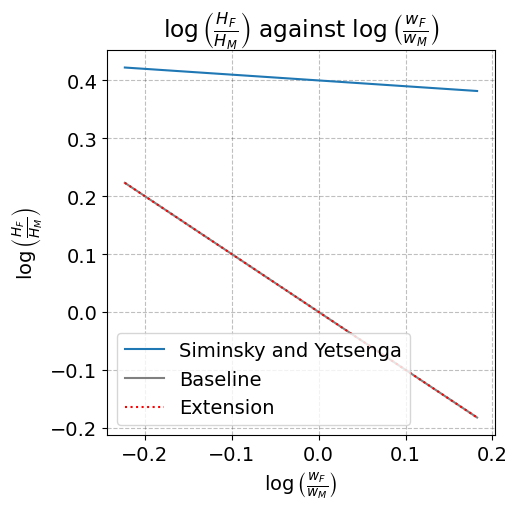

In [15]:
# Set model - extended one
model_ex = HouseholdSpecializationModelClass2()

# The results from Siminsky and Yetsenga (2022)
fig, fig1 = plt.subplots(figsize=(5,5))

x = np.log(model_five.par.wF_vec)
y = model_five.par.beta0_target + model_five.par.beta1_target*x

fig1.plot(x, y, linestyle ='-', label = "Siminsky and Yetsenga")
fig1.set_title(r"$\log\left(\frac{H_{F}}{H_{M}}\right)$" + " against " r"$\log\left(\frac{w_{F}}{w_{M}}\right)$")
fig1.set_xlabel(r"$\log\left(\frac{w_{F}}{w_{M}}\right)$")
fig1.set_ylabel(r"$\log\left(\frac{H_{F}}{H_{M}}\right)$")


# Baseline model
model_three.solve_wF_vec()
x_2 = np.log(model_three.par.wF_vec)
y_2 = np.log(model_three.sol.HF_vec/model_three.sol.HM_vec)

fig1.plot(x_2, y_2, color="grey", linestyle='-', label="Baseline")

# The extended model
model_ex.solve_wF_vec()
x_1 = np.log(model_ex.par.wF_vec)
y_1 = np.log(model_ex.sol.HF_vec/model_ex.sol.HM_vec)
fig1.plot(x_1, y_1, color = "red", linestyle=':', label="Extension")


# add to plot
fig1.legend()
plt.show()

I find that my model extension do not seem to help match the data. My extension appears to graphically yield the approximately same result as the baseline model. Setting a higher $\nu$ and/or $\kappa$ value could perhaps improve the fit.

I acknowledge that my $\nu$ and $\kappa$ values tested probably do not vary enough from the baseline model. This leads to my results being quite unchanged - very small.